In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

데이터를 나누는 이유<br>
\>>> 본 적 없는 데이터들을 모델이 얼마나 잘 일반화하는지 알기 위해서 <br>
<br>
그렇다면 테스트 세트를 사용하면 안되는 이유는 사용하는 순간 그 목적을 상실하는 것이기 때문에?<br>
낙관적으로 예측하게 된다는 말도 여기서 나오는 것?

# 교차 검증

데이터를 더 잘게 쪼개 폴드 조합으로 훈련, 평가, 조정하는 기법<br>
k개만큼 쪼개 k번 평가하면 """k겹 교차 검증"""

In [5]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression().fit(X_train, y_train)

logreg.score(X_test, y_test)

0.88

In [6]:
"""
    cross_val_score(모델, X_train, y_train, cv=5) 
    
    cv 겹 교차검증 결과 출력
"""

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

cross_val_score(logreg, iris.data, iris.target)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [7]:
"""
    해석
        최선의 경우 1, 최악의 경우 0.93, 평균 0.973의 성능 발휘
        차이가 크다는 것은 모델이 폴드에 의존적이거나 데이터셋이 작기 때문일 수 있음
"""

cross_val_score(logreg, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.93333333,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [8]:
cross_val_score(logreg, iris.data, iris.target).mean()

0.9733333333333334

In [9]:
"""
    cross_validate(모델, X_train, y_train, return_train_score)
    
    모델 교차검증 전체 결과 요약
"""

from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)
res

{'fit_time': array([0.06781721, 0.06381464, 0.03291249, 0.05009842, 0.06781793]),
 'score_time': array([0.00099778, 0.        , 0.        , 0.00076509, 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [7]:
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.104402,0.000997,0.966667,0.966667
1,0.110304,0.001001,1.000000,0.966667
2,0.072200,0.000842,0.933333,0.983333
3,0.080230,0.001135,0.966667,0.983333
4,0.078475,0.000000,1.000000,0.975000


In [8]:
res_df.mean()

fit_time       0.089122
score_time     0.000795
test_score     0.973333
train_score    0.975000
dtype: float64

교처 검증의 장점 <br>
- 모델이 훈련셋에 얼마나 민감한지 알 수 있다 >>> 정확도 편차
- 효과적으로 데이터를 활용할 수 있다<br>
\>>> 같은 양이라도 한 번만 나눴을 때와 여러 폴드 조합으로 모델을 만들었을 때 효과는 다르다 <br>


단점<br>
시간이 오래 걸린다 <br>
<br>
\*** cross_val_score는 모델이 아니라 점수를 반환 >>> 각 모델의 예측을 알려면 cross_val_predict 사용

### 계층별 k겹 교차검증

k겹 교차검증의 한계: 무작정 나누면 원본의 클래스 구성 비율을 무시하게 된다 >>> 검증의 질 하락 <br>
계층별 k겹 교차검증은 각 폴드의 클래스 구성비를 원본과 유사하게 조성하여 교차검증을 실시한다 <br>

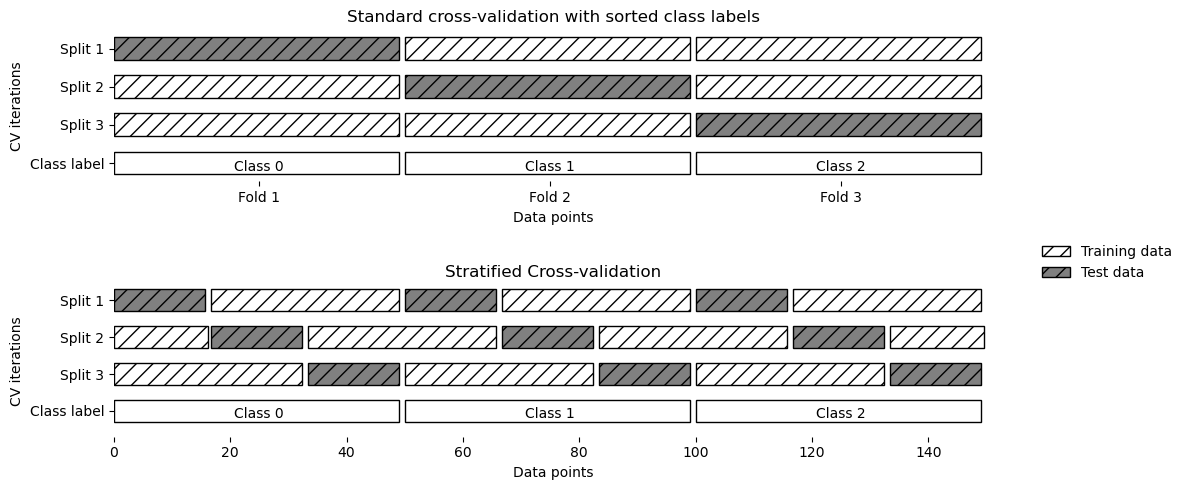

In [10]:
mglearn.plots.plot_stratified_cross_validation()

### 다른 교차 검증 기법

In [10]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

In [11]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [12]:
kfold = KFold(n_splits=3)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0., 0., 0.])

In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0.98, 0.96, 0.96])

In [14]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

len(scores), scores.mean()

(150, 0.9666666666666667)

In [15]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

scores

array([0.92      , 0.92      , 0.92      , 0.94666667, 0.96      ,
       0.92      , 0.94666667, 0.98666667, 0.94666667, 0.93333333])

In [16]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))

scores

array([0.75      , 0.6       , 0.66666667])

In [17]:
from sklearn.model_selection import StratifiedKFold

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [18]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)

scores, scores.mean()

(array([1.        , 0.96666667, 0.93333333, 1.        , 0.93333333,
        0.96666667, 0.96666667, 0.93333333, 1.        , 0.96666667,
        0.93333333, 1.        , 1.        , 0.96666667, 0.96666667,
        0.9       , 1.        , 1.        , 0.93333333, 0.96666667,
        0.93333333, 0.96666667, 0.96666667, 1.        , 0.96666667,
        1.        , 0.96666667, 0.96666667, 0.9       , 1.        ,
        0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.93333333,
        0.96666667, 0.96666667, 1.        , 1.        , 0.9       ,
        0.96666667, 1.        , 0.9       , 0.96666667, 0.96666667,
        0.9       , 0.96666667, 0.96666667, 1.        , 0.96666667]),
 0.9646666666666667)

In [19]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train.shape[0], X_test.shape[0]

(112, 38)

In [20]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_test, y_test)
        
        if score > best_score: 
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}


In [21]:
best_score

0.9736842105263158

In [22]:
best_parameters

{'C': 100, 'gamma': 0.001}

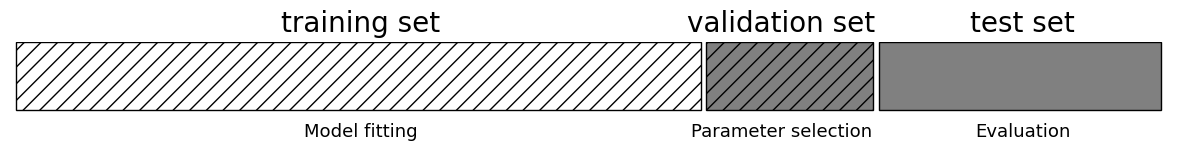

In [23]:
mglearn.plots.plot_threefold_split()

In [24]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

X_train.shape[0], X_valid.shape[0], X_test.shape[0]

(84, 28, 38)

In [25]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_valid, y_valid)
        
        if score > best_score: 
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}


In [26]:
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)

In [27]:
best_score, best_parameters

(0.9642857142857143, {'C': 10, 'gamma': 0.001})

In [28]:
test_score

0.9210526315789473

In [29]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        
        if score > best_score: 
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (36).

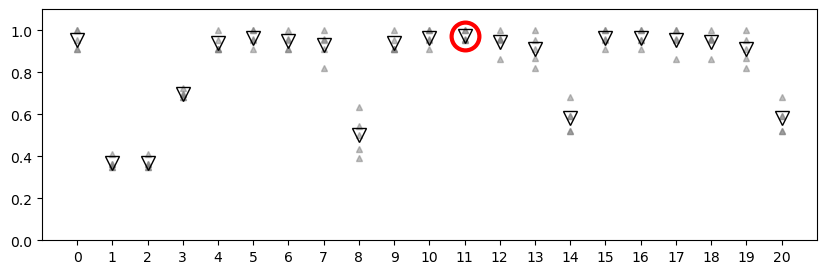

In [30]:
mglearn.plots.plot_cross_val_selection()

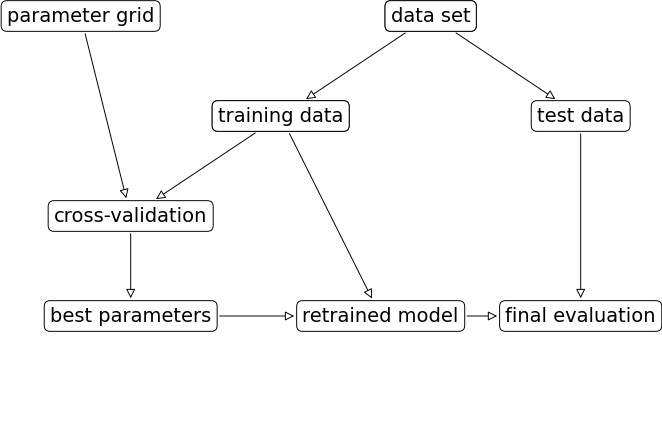

In [31]:
mglearn.plots.plot_grid_search_overview()

In [32]:
param_grid = {
    'C': [10**x for x in range(-3, 3)],
    'gamma': [10**x for x in range(-3, 3)]
}

param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [33]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [35]:
grid_search.score(X_test, y_test)

0.9736842105263158

In [36]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [37]:
grid_search.best_score_

0.9731225296442687

In [38]:
grid_search.best_estimator_

SVC(C=10, gamma=0.1)

In [39]:
pd.set_option('display.max_columns', None)

results = pd.DataFrame(grid_search.cv_results_)
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.003119,0.003991,0.003349,0.002363,0.002921
std_fit_time,0.000485,0.001894,0.000549,0.000455,0.001233
mean_score_time,0.00298,0.001594,0.001894,0.001197,0.003256
std_score_time,0.002533,0.000796,0.000688,0.000399,0.002652
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


In [40]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.003119,0.003991,0.003349,0.002363,0.002921,0.004778,0.002994,0.002672,0.003377,0.003801,0.003982,0.005433,0.003789,0.00379,0.002731,0.003112,0.003524,0.003796,0.003795,0.003173,0.001709,0.002615,0.004146,0.004001,0.002615,0.002292,0.002062,0.00359,0.003806,0.003682,0.002814,0.002606,0.003779,0.002196,0.002779,0.004587
std_fit_time,0.000485,0.001894,0.000549,0.000455,0.001233,0.001828,0.000631,0.000412,0.001269,0.001178,0.001445,0.001979,0.001163,0.002128,0.000387,0.000764,0.00144,0.001159,0.001744,0.000764,0.000393,0.000397,0.000751,0.000632,0.000501,0.000784,0.000228,0.00049,0.000889,0.002195,0.00195,0.001233,0.002374,0.000748,0.00072,0.001018
mean_score_time,0.00298,0.001594,0.001894,0.001197,0.003256,0.001927,0.001607,0.001369,0.001324,0.002185,0.001142,0.001838,0.003096,0.001795,0.002674,0.001557,0.001783,0.002405,0.001988,0.002375,0.001434,0.000901,0.002,0.002281,0.00154,0.001169,0.001494,0.001293,0.001894,0.00159,0.001438,0.001226,0.001206,0.001523,0.002022,0.001596
std_score_time,0.002533,0.000796,0.000688,0.000399,0.002652,0.00066,0.000499,0.000693,0.000548,0.001481,0.000433,0.000295,0.001559,0.000398,0.001238,0.000462,0.000393,0.001872,0.000884,0.001366,0.000453,0.000172,0.000749,0.000804,0.000476,0.000372,0.000635,0.000388,0.000663,0.001014,0.000457,0.000389,0.000975,0.000448,0.001143,0.000488
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}","{'C': 0.001, 'gamma': 100}","{'C': 0.01, 'gamma': 0.001}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.1}","{'C': 0.01, 'gamma': 1}","{'C': 0.01, 'gamma': 10}","{'C': 0.01, 'gamma': 100}","{'C': 0.1, 'gamma': 0.001}","{'C': 0.1, 'gamma': 0.01}","{'C': 0.1, 'gamma': 0.1}","{'C': 0.1, 'gamma': 1}","{'C': 0.1, 'gamma': 10}","{'C': 0.1, 'gamma': 100}","{'C': 1, 'gamma': 0.001}","{'C': 1, 'gamma': 0.01}","{'C': 1, 'gamma': 0.1}","{'C': 1, 'gamma': 1}","{'C': 1, 'gamma': 10}","{'C': 1, 'gamma': 100}","{'C': 10, 'gamma': 0.001}","{'C': 10, 'gamma': 0.01}","{'C': 10, 'gamma': 0.1}","{'C': 10, 'gamma': 1}","{'C': 10, 'gamma': 10}","{'C': 10, 'gamma': 100}","{'C': 100, 'gamma': 0.001}","{'C': 100, 'gamma': 0.01}","{'C': 100, 'gamma': 0.1}","{'C': 100, 'gamma': 1}","{'C': 100, 'gamma': 10}","{'C': 100, 'gamma': 100}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.695652,0.913043,1.0,0.347826,0.347826,0.695652,0.913043,1.0,0.956522,0.913043,0.391304,0.913043,1.0,1.0,0.956522,0.869565,0.521739,1.0,1.0,1.0,0.956522,0.869565,0.521739
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.695652,0.913043,0.913043,0.347826,0.347826,0.695652,0.913043,0.956522,0.913043,0.956522,0.434783,0.913043,0.956522,0.956522,0.956522,0.913043,0.521739,0.956522,0.913043,0.956522,0.956522,0.913043,0.521739
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.681818,0.909091,1.0,0.363636,0.363636,0.681818,1.0,1.0,1.0,1.0,0.545455,1.0,1.0,1.0,1.0,1.0,0.590909,1.0,1.0,1.0,1.0,1.0,0.590909


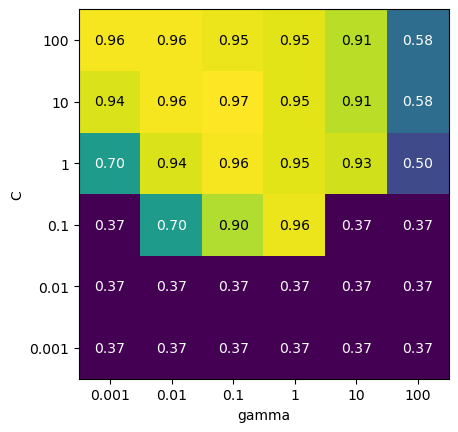

In [41]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(
    scores,
    xlabel='gamma', xticklabels=param_grid['gamma'], 
    ylabel='C', yticklabels=param_grid['C'],
    cmap='viridis'
)

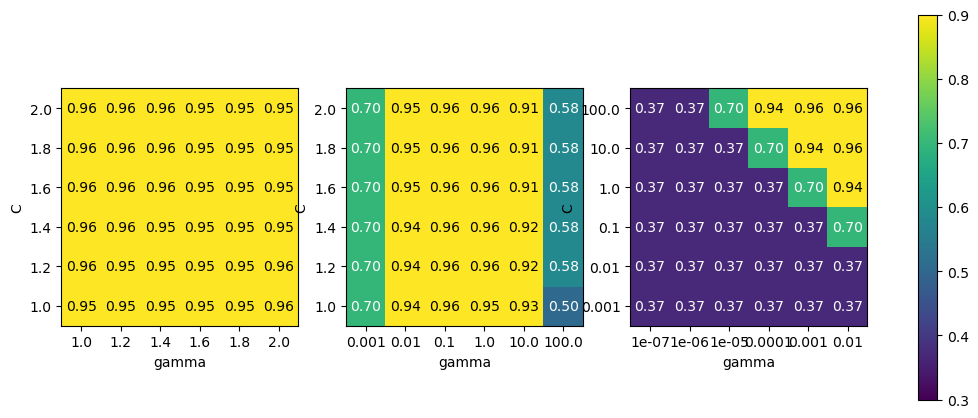

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {
    'C': np.linspace(1, 2, 6),
    'gamma': np.linspace(1, 2, 6)
}

param_grid_one_log = {
    'C': np.linspace(1, 2, 6),
    'gamma': np.logspace(-3, 2, 6)
}

param_grid_range = {
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-7, -2, 6)
}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    scores_image = mglearn.tools.heatmap(
        scores,
        xlabel='gamma', xticklabels=param_grid['gamma'], 
        ylabel='C', yticklabels=param_grid['C'],
        cmap='viridis', ax=ax, vmin=0.3, vmax=0.9
    )

plt.colorbar(scores_image, ax=axes.tolist())

In [43]:
param_grid = [
    {
        'kernel': ['rbf'],
        'C': [10**x for x in range(-3, 3)],
        'gamma': [10**x for x in range(-3, 3)]
    },
    {
        'kernel': ['linear'],
        'C': [10**x for x in range(-3, 3)]
    }
]

param_grid

[{'kernel': ['rbf'],
  'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
 {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [44]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_, grid_search.best_score_

({'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, 0.9731225296442687)

In [45]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.003796,0.003293,0.003037,0.003346,0.003829,0.004315,0.005718,0.003868,0.002512,0.003391,0.003191,0.003989,0.00379,0.003448,0.003171,0.003029,0.002979,0.003382,0.002577,0.003323,0.002048,0.001993,0.004738,0.004679,0.002654,0.002203,0.001701,0.002485,0.00355,0.004379,0.002662,0.002235,0.002139,0.002395,0.003184,0.003901,0.003359,0.00299,0.002194,0.001397,0.001197,0.001502
std_fit_time,0.001176,0.000796,0.000706,0.000686,0.001136,0.00205,0.001217,0.000837,0.000893,0.001017,0.000399,0.000892,0.000399,0.001047,0.000722,0.000633,0.000916,0.001208,0.000527,0.001714,0.000098,0.000626,0.001245,0.000984,0.000614,0.000416,0.000395,0.000882,0.000458,0.000785,0.000713,0.000381,0.000682,0.00049,0.001158,0.000908,0.000438,0.000002,0.000746,0.000629,0.000399,0.000429
mean_score_time,0.001881,0.002032,0.00135,0.002242,0.001907,0.003407,0.001994,0.00237,0.001388,0.002217,0.00222,0.001808,0.001795,0.001324,0.002121,0.001385,0.001377,0.002297,0.001701,0.00232,0.001347,0.001392,0.00214,0.001903,0.001777,0.001508,0.00122,0.00084,0.001839,0.002387,0.00141,0.000964,0.001046,0.000998,0.001448,0.00194,0.001477,0.001595,0.001795,0.000697,0.001168,0.000492
std_score_time,0.000456,0.000233,0.000438,0.001252,0.000169,0.001027,0.000631,0.001038,0.000486,0.000389,0.00039,0.000406,0.000399,0.000416,0.000218,0.00052,0.000466,0.0004,0.000599,0.001138,0.000536,0.000795,0.000698,0.000507,0.00027,0.00046,0.000415,0.000454,0.001136,0.000484,0.000506,0.000066,0.00013,0.000001,0.000556,0.000501,0.000605,0.000489,0.002129,0.000262,0.000167,0.000429
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': '

In [46]:
param_grid = {
    'C': [10**x for x in range(-3, 3)],
    'gamma': [10**x for x in range(-3, 3)]
}

scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)

scores, scores.mean()

(array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]),
 0.9800000000000001)

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

param_dist = [
    {
        'kernel': ['rbf'],
        'C': loguniform(0.001, 100),
        'gamma': loguniform(0.001, 100)
    },
    {
        'kernel': ['linear'],
        'C': loguniform(0.001, 100)
    }
]

In [48]:
rand_search = RandomizedSearchCV(SVC(), param_dist, n_iter=20, random_state=42, n_jobs=-1)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002356C247C40>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002356C20E040>,
                                         'kernel': ['rbf']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002356C247BE0>,
                                         'kernel': ['linear']}],
                   random_state=42)

In [49]:
rand_search.best_params_, rand_search.best_score_

({'C': 1.7965626423790642, 'kernel': 'linear'}, 0.9731225296442687)

In [50]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [
    {
        'kernel': ['rbf'],
        'C': [10**x for x in range(-3, 3)],
        'gamma': [10**x for x in range(-3, 3)]
    },
    {
        'kernel': ['linear'],
        'C': [10**x for x in range(-3, 3)]
    }
]

halv_search = HalvingGridSearchCV(SVC(), param_grid, verbose=1, random_state=42, n_jobs=-1)
halv_search.fit(X_train, y_train)

halv_search.best_params_, halv_search.best_score_

n_iterations: 2
n_required_iterations: 4
n_possible_iterations: 2
min_resources_: 30
max_resources_: 112
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 42
n_resources: 30
Fitting 5 folds for each of 42 candidates, totalling 210 fits
----------
iter: 1
n_candidates: 14
n_resources: 90
Fitting 5 folds for each of 14 candidates, totalling 70 fits


({'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}, 0.9653594771241831)

In [51]:
halv_search.n_candidates_, halv_search.n_resources_

([42, 14], [30, 90])

In [52]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [53]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
confusion

array([[402,   1],
       [  6,  41]], dtype=int64)

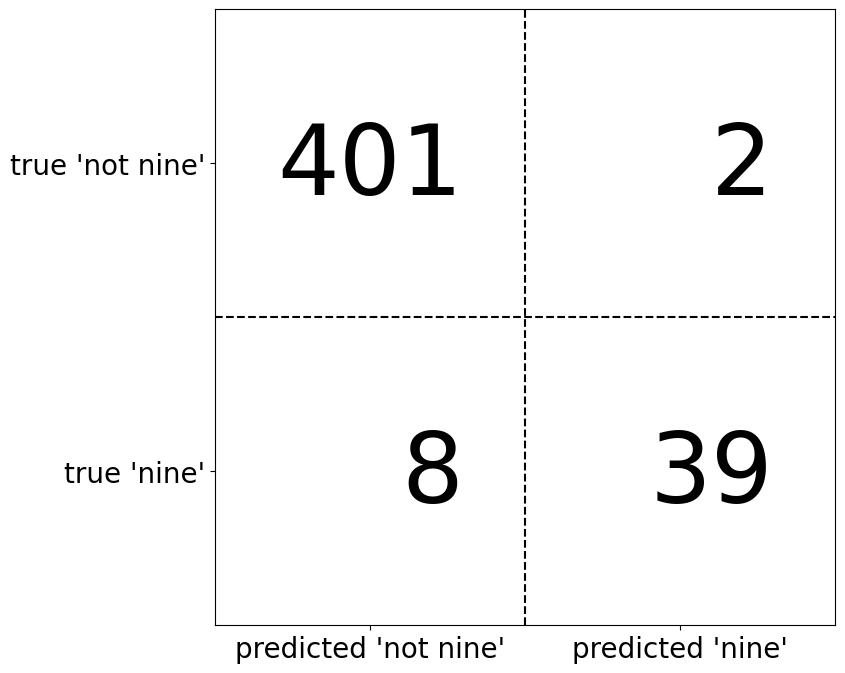

In [55]:
mglearn.plots.plot_confusion_matrix_illustration()

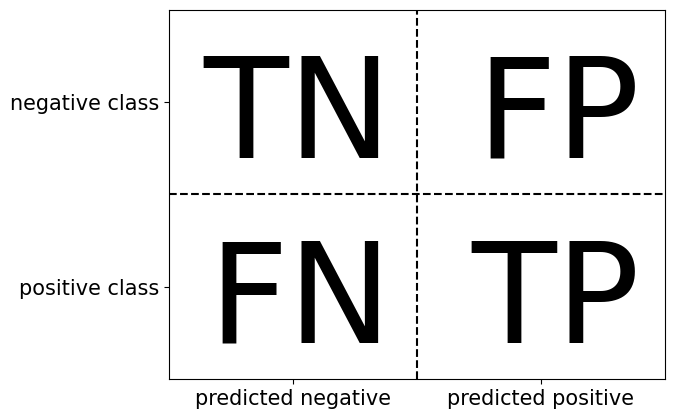

In [56]:
mglearn.plots.plot_binary_confusion_matrix()

In [57]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [58]:
confusion_matrix(y_test, pred_most_frequent)

array([[403,   0],
       [ 47,   0]], dtype=int64)

In [59]:
confusion_matrix(y_test, pred_dummy)

array([[364,  39],
       [ 44,   3]], dtype=int64)

In [60]:
confusion_matrix(y_test, pred_tree)

array([[390,  13],
       [ 24,  23]], dtype=int64)

In [61]:
confusion_matrix(y_test, pred_logreg)

array([[402,   1],
       [  6,  41]], dtype=int64)

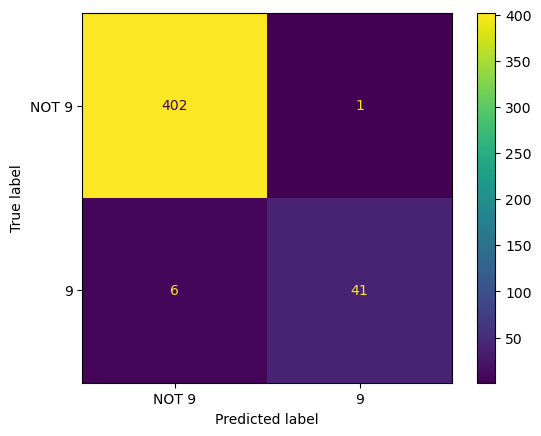

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=['NOT 9', '9'])

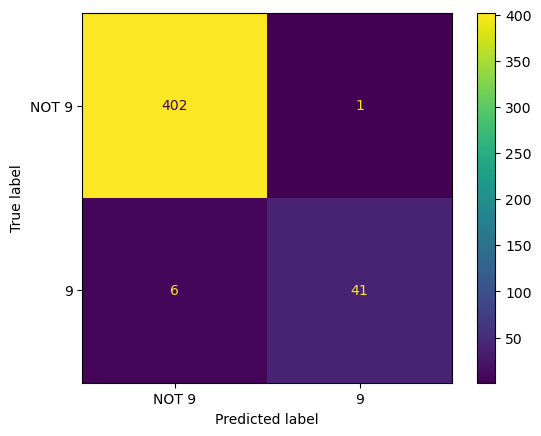

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_logreg, display_labels=['NOT 9', 9])

plt.show()

정밀도: $TP \over TP + FP$ <br>
재현율: $TP \over TP + FN$  ( aka 민감도, 적중률, 진짜 양성 비율 (TPR) )<br>
정밀도와 재현율은 트레이드 오프 관계 <br>
&nbsp; 이유<br>
- 만약에 재현율을 높이겠다고 전부 Positive로 분류했다고 하면
- 그 중 대부분은 FP로 분류될 것
- 결국 재현율은 ~1이 되겠지만 정밀도는 ~0이 될 것
- 그 반대도 마찬가지

F1 점수 <br>
<br>
정밀도, 재현율의 조화 평균<br>
식: $F1=2*{(정밀도*재현율) \over (정밀도+재현율)}$
<br><br>
F점수의 일반화된 가중치 조화 평균 (P: 정밀도, R: 재현율) <br>
$
\begin {matrix} 
F
    &=& {1 \over \alpha {1 \over P } + (1-\alpha) {1 \over P} } \\
    &=& { { \beta^{2}+1 }PR } \over {\beta^{2}P+R}
\end {matrix}
$<br>
(여기서 $\beta^{2} = { {1-\alpha} \over {\alpha} }$) <br>
$f_1$은 $\beta=1$일 때 (즉 정밀도와 재현율의 가중치가 $\alpha=0.5$로 동일할 때 점수이다 <br>
$\beta > 1$이면 재현율이 강조되고, $\beta < 1$이면 정밀도과 강조된다

In [64]:
""" 각 모델 별 f1 score """

from sklearn.metrics import f1_score

print(
    "빈도 기반 dummy model: {:.2f}".format(f1_score(y_test, pred_most_frequent)),
    "무작위 dummy model: {:.2f}".format(f1_score(y_test, pred_dummy)),
    "트리 model: {:.2f}".format(f1_score(y_test, pred_tree)),
    "logistic model: {:.2f}".format(f1_score(y_test, pred_logreg)),
    sep='\n'
)

빈도 기반 dummy model: 0.00
무작위 dummy model: 0.07
트리 model: 0.55
logistic model: 0.92


F1 점수의 한계: 어떤 모델이 좋아보이는지 잘 알 수는 있어도 그 의미를 해석하기 어렵다

In [65]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    pred_most_frequent,
    target_names=['NOT 9', '9'],
    zero_division=0
))

              precision    recall  f1-score   support

       NOT 9       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [66]:
print(
    classification_report(
        y_test,
        pred_logreg,
        target_names=['NOT 9', '9'],
        zero_division=0
    )
)

              precision    recall  f1-score   support

       NOT 9       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [67]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)

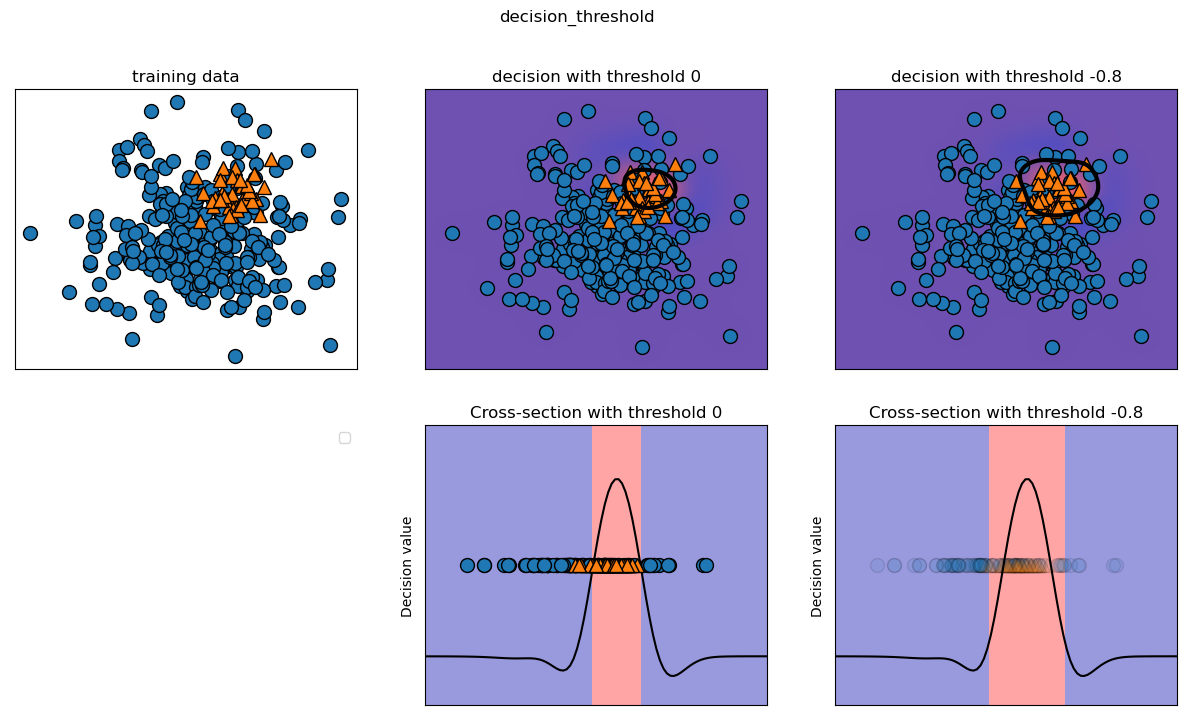

In [68]:
mglearn.plots.plot_decision_threshold()

In [69]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [70]:
y_pred_lower_threshold = svc.decision_function(X_test) > (-0.8)

In [71]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [72]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

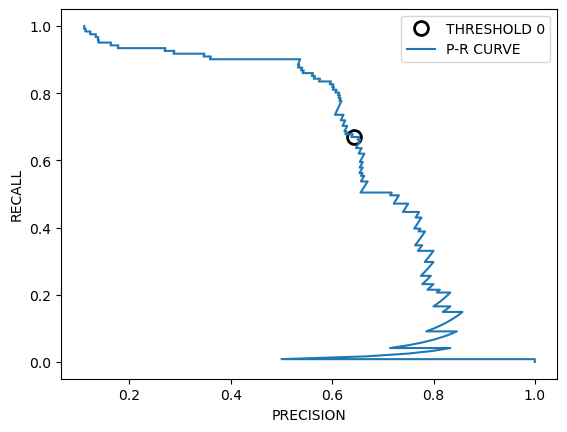

In [73]:
"""
    본 예시에선 테스트셋을 그대로 썼지만
    실전에선 교차 검증 훈련셋을 사용해 훈련한 뒤 검증셋을 사용해 테스트 해야 한다
"""

X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=0.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test)
)

""" 임계값 표시: 정확히 0이 아닐 수 있으므로 다음과 같이 산출 """
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='THRESHOLD 0', fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label='P-R CURVE')
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.legend()

plt.show()

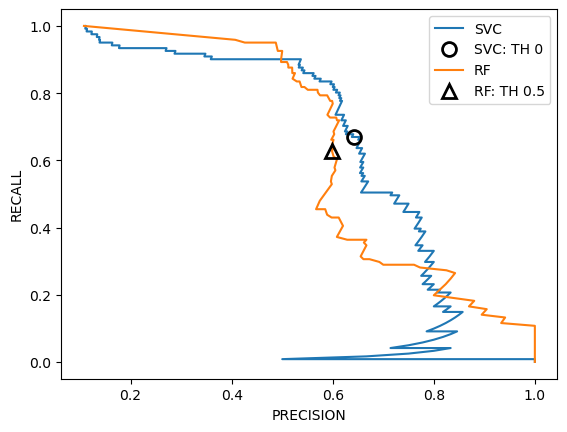

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[ : , 1])

plt.plot(precision, recall, label='SVC')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='SVC: TH 0', fillstyle='none', c='k', mew=2)

close_defalult_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf, recall_rf, label='RF')
plt.plot(
    precision_rf[close_defalult_rf], recall_rf[close_defalult_rf], '^', c='k', markersize=10, label='RF: TH 0.5', fillstyle='none', mew=2
)

plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.legend()

plt.show()

In [75]:
f1_score(y_test, rf.predict(X_test))

0.6097560975609757

In [77]:
f1_score(y_test, svc.predict(X_test))

0.6558704453441295

In [91]:
"""
    랜덤 포레스트껀 predict_proba(test)[ : , 1]을 쓰는 이유
    >>> 그냥 하면 [양성, 음성일 확률] 둘 다 나오기 때문에 한 쪽만 잘라 쓰는 것
"""

from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[ : , 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

ap_rf, ap_svc

(0.659559370099291, 0.6663140319391998)

In [88]:
rf.predict_proba(X_test)[ : , 1]

array([0.  , 0.35, 0.7 , ..., 0.  , 0.  , 0.  ])

In [89]:
rf.predict_proba(X_test)

array([[1.  , 0.  ],
       [0.65, 0.35],
       [0.3 , 0.7 ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

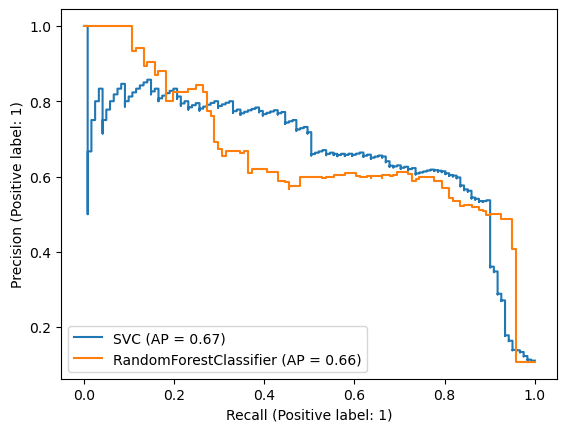

In [80]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots()

PrecisionRecallDisplay.from_estimator(svc, X_test, y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, ax=ax)

plt.show()

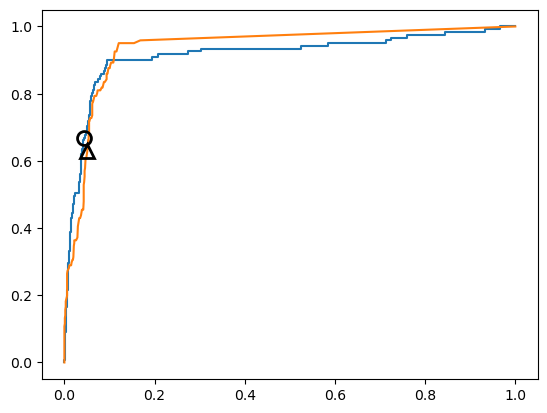

In [87]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[ : , 1])
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr_svc, tpr_svc, label='ROC(SVC)')
plt.plot(fpr_rf, tpr_rf, label='ROC(RF)')

close_defalult_rf = np.argmin(np.abs(thresholds_rf - 0.5))
close_zero = np.argmin(np.abs(thresholds_svc))

plt.plot(fpr_svc[close_zero], tpr_svc[close_zero], 'o', markersize=10, label='SVC TH: 0', fillstyle='none', c='k', mew=2)

plt.plot(fpr_rf[close_defalult_rf], tpr_rf[close_defalult_rf], '^', markersize=10, label='RF TH: 0', fillstyle='none', c='k', mew=2)

In [92]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[ : , 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

rf_auc, svc_auc

(0.9366953672911659, 0.9162935036712654)

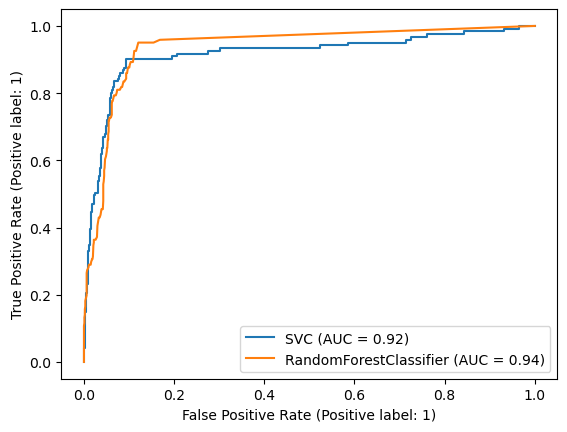

In [94]:
"""
    from_estimator VS from_predictions
    
    from_estimator(추정기 객체, 데이터, 타겟, AxesSubplot)
    from_predictions(타겟, 예측결과(~decision_function), AxesSubplot)
"""

from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax)

plt.show()

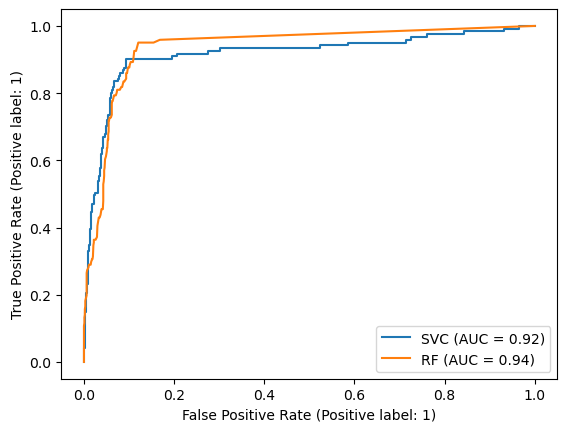

In [96]:
fig, ax = plt.subplots()

RocCurveDisplay.from_predictions(y_test, svc.decision_function(X_test), name='SVC', ax=ax)
RocCurveDisplay.from_predictions(y_test, rf.predict_proba(X_test)[ : , 1], name='RF', ax=ax)

plt.show()

gamma=1.00, accuracy=0.90, AUC=0.50
gamma=0.10, accuracy=0.90, AUC=0.96
gamma=0.01, accuracy=0.90, AUC=1.00


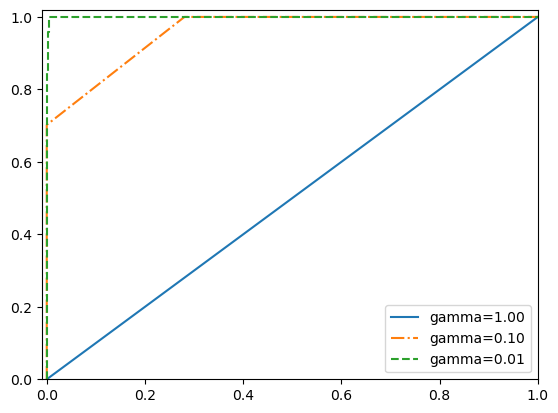

In [98]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma, ls in zip([1, 0.1, 0.01], ['-', '-.', '--']):
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    
    print('gamma={:.2f}, accuracy={:.2f}, AUC={:.2f}'.format(gamma, accuracy, auc))
    
    plt.plot(fpr, tpr, label='gamma={:.2f}'.format(gamma), linestyle=ls)
    
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend()

plt.show()

In [112]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)

In [113]:
accuracy_score(y_test, pred)

0.9533333333333334

In [114]:
confusion_matrix(y_test, pred)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 41,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  1,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 44]], dtype=int64)

In [110]:
np.round(lr.predict_proba(X_test)[ : 10], 3)

array([[0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.23 , 0.   , 0.   , 0.   , 0.77 ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.997, 0.   , 0.002,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ],
       [0.   , 0.   , 0.   , 0.009, 0.   , 0.012, 0.   , 0.   , 0.978,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ,
        0.   ]])

<AxesSubplot: >

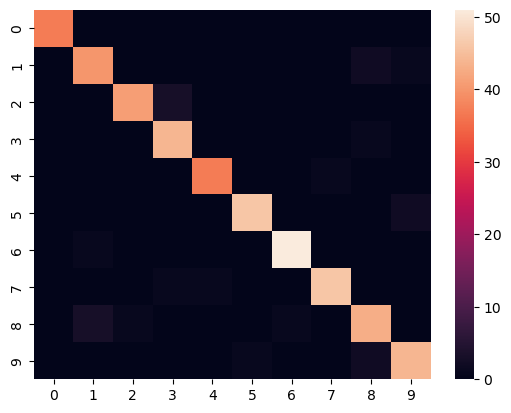

In [120]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, pred), fmt='%d')

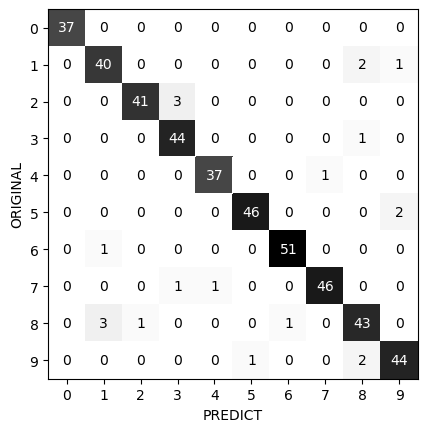

In [119]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), 
    xlabel='PREDICT', ylabel='ORIGINAL',
    xticklabels=digits.target_names, yticklabels=digits.target_names,
    cmap=plt.cm.gray_r,
    fmt='%d'
)

plt.gca().invert_yaxis()

plt.show()

In [121]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [123]:
print(
    'micro f_1: {:.3f}'.format(f1_score(y_test, pred, average='micro')),
    'macro f_1: {:.3f}'.format(f1_score(y_test, pred, average='macro')),
    sep='\n'
)

micro f_1: 0.953
macro f_1: 0.954
